<a href="https://colab.research.google.com/github/irfanbykara/Machine-Learning-Notebooks/blob/main/Bike_Sharing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Regression
In this notebook, we will be dealing with a bike demand data that is collected by a mobile autonomus bike rental app. This data is available at https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset . Our main purpose is to conduct explaratory data analysis on the data to make sense of it and then apply regression models to predict the bike demand for given features. Keep in mind that we use hour.csv file although there are several files in the dataset. Enjoy reading! :)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()
print('Importing done.')

Importing done.


In [ ]:
raw_data = pd.read_csv('hour.csv',) 
raw_data.head()

In [ ]:
#This is a nice relatively big data. These data are taken from a portugal bike sharing app. All data are real.
raw_data.shape

(17379, 17)

In [ ]:
#Renaming the columns for god's sake.
raw_data.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [ ]:
#Very good.
raw_data.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [ ]:
# We might only need to convert data time to datetime object. It doesn't seem so tho, it doesn't add much value to the model at first sight.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [ ]:
#Notice that continous values are already normalized, that's why min values for humidity, windspeed,temp and atemp are 0, while max values are 1.
raw_data.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#Necessary type changes.

raw_data['datetime'] = pd.to_datetime(raw_data.datetime)

# categorical variables
raw_data['season'] = raw_data.season.astype('category')
raw_data['is_holiday'] = raw_data.is_holiday.astype('category')
raw_data['weekday'] = raw_data.weekday.astype('category')
raw_data['weather_condition'] = raw_data.weather_condition.astype('category')
raw_data['is_workingday'] = raw_data.is_workingday.astype('category')
raw_data['month'] = raw_data.month.astype('category')
raw_data['year'] = raw_data.year.astype('category')
raw_data['hour'] = raw_data.hour.astype('category')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

**EDA (Explaratory Data Analysis)**

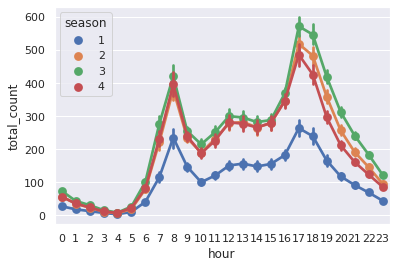

In [ ]:
# This graph will give us an intuition about the bike demand depending on hour and season.
# While winter is the lowest, others have almost the same demand. Drawing the same shape through hours.

sns.pointplot(data=raw_data[['hour','total_count','season']],
              x='hour',y='total_count',
              hue='season')

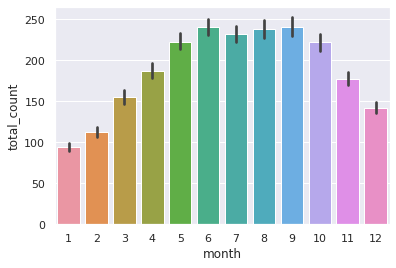

In [ ]:
#Warmer times are high in demand as expected. But I can't help but wonder why december's demand is way lower than january's. 
# Probably in the location these data was collected January is much colder then December. And for your info, these data was collected in Portugal.

sns.barplot(data=raw_data[['month','total_count']],
            x='month',y='total_count')

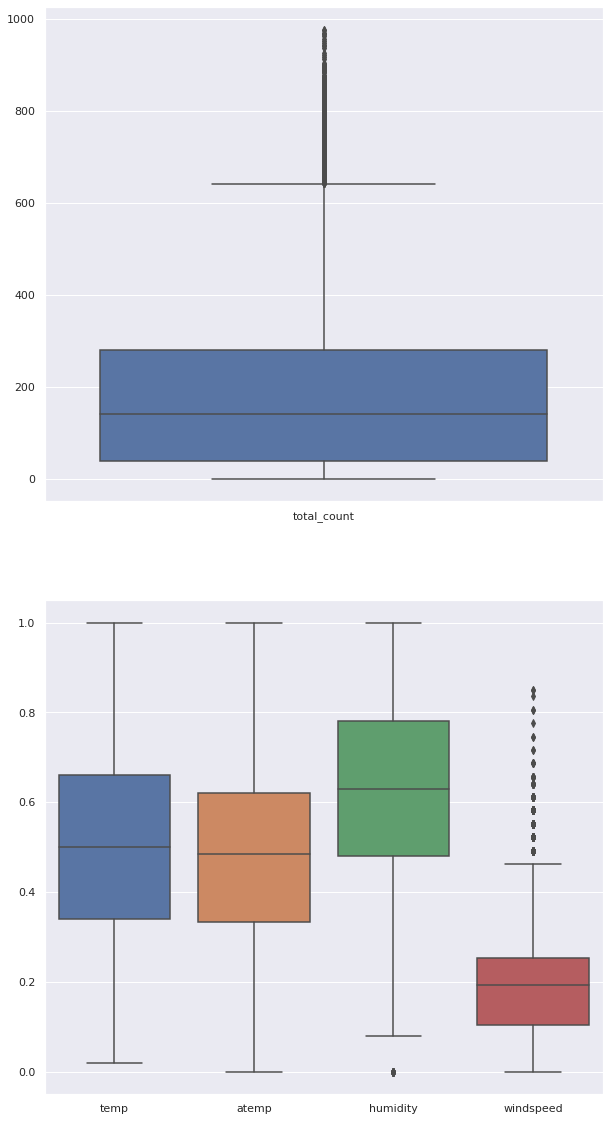

In [ ]:
#Boxplots...
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(10,20))

sns.boxplot(data=raw_data[raw_data.columns[16:17]], ax=ax1)
sns.boxplot(data=raw_data[raw_data.columns[8:14]], ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


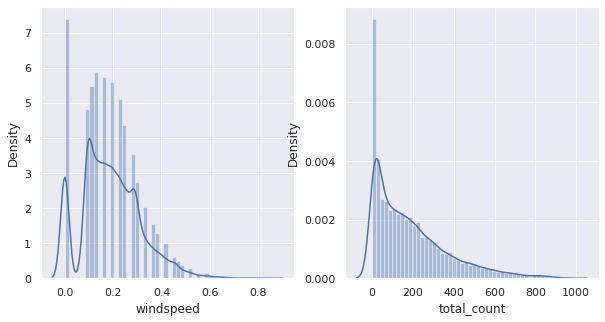

In [ ]:
# There are many outliers in windspeed and total_count. Let's investigate them. Others seem like decent cute normally distributed data. No need to worry about them.

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize =(10,5))
sns.distplot(raw_data['windspeed'],ax=ax1)
sns.distplot(raw_data['total_count'],ax=ax2)

#These two both are right-skewed. It is an option to take the 0.9 quantiles to shrink the data and force it to follow a normal distribution. But I'll leave it as it is. I don't want to lose 
#valuable info.

**Checking for Assumptions: Multicollinearity**
Let's check the independent variables for correleation between each other.




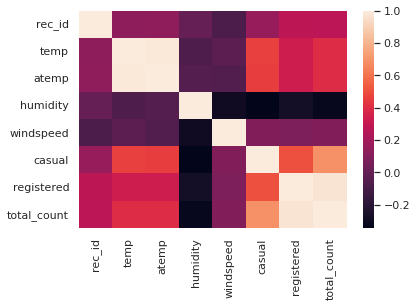

In [ ]:
corr_mat = raw_data.corr()
sns.heatmap(corr_mat)

In [ ]:
# Seems like we have a really high correlation between temp and a temp. It was expected since atemp stands for the feeling temperature and temp for temperature. 
#Let's check the values 

raw_data['atemp'].corr(raw_data['temp'])

# These two have more similarities than Chad Smith and Will Ferrell. 

0.9876721390396492

In [ ]:
#Let's drop the atemp.
raw_data = raw_data.drop('atemp',axis=1)

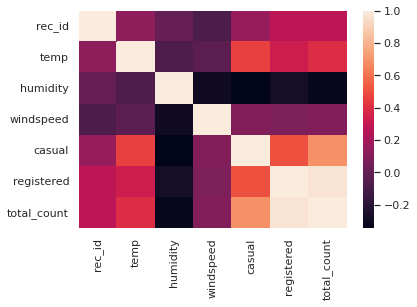

In [ ]:
#Looks better now.
corr_mat = raw_data.corr()
sns.heatmap(corr_mat)

In [ ]:
# Vif scores bigger than 10 show high correlation. Let's see.
corr_cols = raw_data.drop(['total_count','datetime'], axis=1)
corr_cols
vif_data = pd.DataFrame()
vif_data["feature"] = corr_cols.columns

vif_data
# # calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(corr_cols.values, i)
                          for i in range(len(corr_cols.columns))]
  
print(vif_data)


              feature          VIF
0              rec_id  2015.704619
1              season    21.274296
2                year   765.360320
3               month   595.040283
4                hour     4.306840
5          is_holiday     1.100342
6             weekday     3.098420
7       is_workingday     4.181663
8   weather_condition     7.632197
9                temp    10.859104
10           humidity    13.241314
11          windspeed     3.282498
12             casual     3.277309
13         registered     3.600767


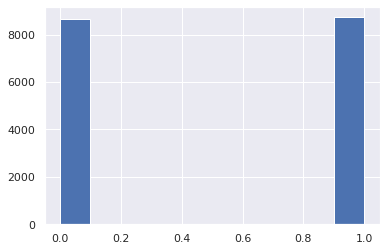

In [ ]:
# I do not think we need year column either. Let's check if it adds important value to our model. 

raw_data['year'].hist()

# There are only two years with equal occurences. Let's check for it's relation with total_count.


In [ ]:
count_in_year_1 = raw_data[raw_data['year']==0].total_count
count_in_year_2 = raw_data[raw_data['year']==1].total_count
print(f'Total count for first year: {count_in_year_1.sum()}, \nTotal count for second year: {count_in_year_2.sum()}')

# Since count for second year is way more than that of first, I will leave it. 

Total count for first year: 1243103, 
Total count for second year: 2049576


**Checking for Assumptions - Linearity**

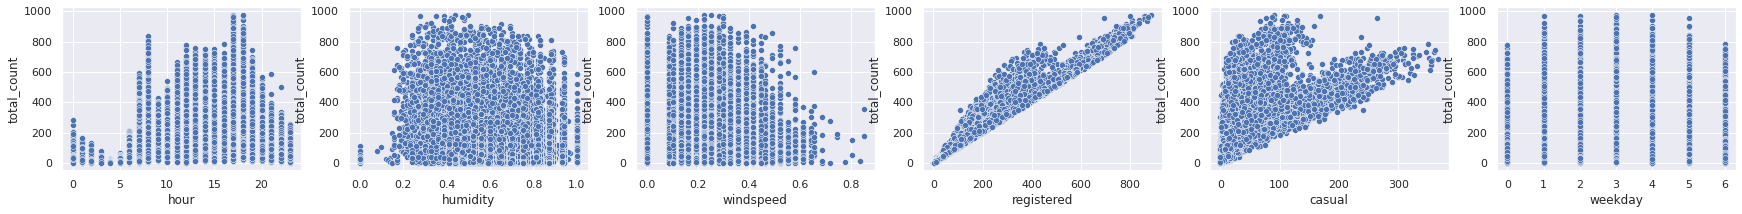

In [ ]:
#It seems like we are not going to be successful with linear regression model considering the graphs below.
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(ncols=6,figsize=(30,3))

axis_list = [ax1,ax2,ax3,ax4,ax5,ax6]
scatter_list = ['hour','humidity','windspeed','registered','casual','weekday']
main_list = zip(scatter_list,axis_list)
for item in main_list:
  sns.scatterplot(data=raw_data,
                  x=raw_data[item[0]],
                  y=raw_data['total_count'],ax=item[1])

#As seen below, only casual and registered columns have some kind of linear relationship with total_count. It was expected. Since we will not be using casual and registered columns in our model
#expecting linear regression model to fit perfectly doesn't seem logical.


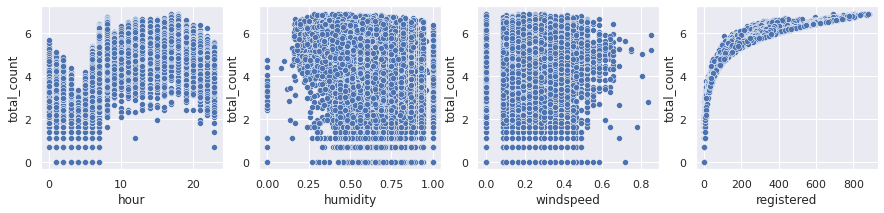

In [ ]:
#Very first thing that comes to mind when non-linearity occurs is to do log transformation.

raw_data_log = raw_data.copy()

log_count = np.log(raw_data_log['total_count'])
raw_data_log['total_count'] = log_count
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(15,3))

axis_list = [ax1,ax2,ax3,ax4]
scatter_list = ['hour','humidity','windspeed','registered']
main_list = zip(scatter_list,axis_list)
for item in main_list:
  sns.scatterplot(data=raw_data_log,
                  x=raw_data_log[item[0]],
                  y=raw_data_log['total_count'],ax=item[1])
  
#No luck here. Let's continue with the raw data without log transformation.

In [ ]:
raw_data = raw_data.drop([
                        'datetime',
                          'rec_id',
                          'casual',
                          'registered',
                          ],axis=1)

In [ ]:
input = raw_data.drop(['total_count'],axis=1)
target = raw_data.total_count
raw_data

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,total_count
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


**Scaling:**
  We could have scaled the scalar values but they are already normalized. Good. What a data scientist like the most is ready-to-use data. No fuss no muss.


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# num_vars = ['temp','humidity','windspeed','month','hour','weekday']
# input[num_vars]= scaler.fit_transform(input[num_vars])


# input


In [ ]:
#Splitting the data 

from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(input, target, 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()


print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))
X

Training set::(11643, 12)(11643, 2)
Testing set::(5736, 12)


,index,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed
0,5749,3,0,9,0,0,5,1,1,0.64,0.65,0.1940
1,1843,2,0,3,13,0,2,1,1,0.50,0.45,0.2239
2,13855,3,1,8,12,0,0,0,1,0.86,0.47,0.5224
3,9723,1,1,2,2,0,3,1,1,0.30,0.61,0.0000
4,10981,2,1,4,17,0,6,0,1,0.54,0.19,0.4179
...,...,...,...,...,...,...,...,...,...,...,...,...
11638,11284,2,1,4,9,0,5,1,1,0.46,0.88,0.0896
11639,11964,2,1,5,17,0,5,1,1,0.66,0.34,0.1343
11640,5390,3,0,8,12,0,3,1,1,0.80,0.43,0.2836
11641,860,1,0,2,7,0,2,1,1,0.24,0.65,0.4179


In [ ]:
X = pd.get_dummies(X, columns=['season','is_holiday',
                 'weather_condition','is_workingday','year'
                #  'month','hour','weekday',
                 ],drop_first=True)
X_test = pd.get_dummies(X_test, columns=['season','is_holiday',
                 'weather_condition','is_workingday','year'
                #  'month','hour','weekday',
                 ],drop_first=True)


In [ ]:
y = y.total_count.values.reshape(-1,1)
y

array([[ 64],
       [106],
       [491],
       ...,
       [189],
       [100],
       [779]])

In [ ]:
#Are you ready to roll?

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_val_predict
reg = LinearRegression()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'R2 Scores')

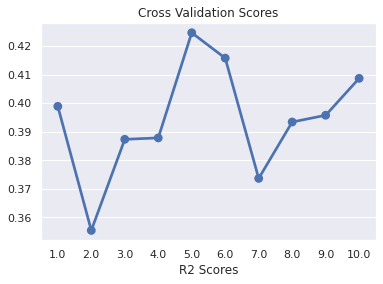

In [ ]:
#Even though I do not think it is necessary to use cross validation to evaluate the model, let's do it to show we can.
r2_scores = cross_val_score(reg, X, y, cv=10)
mse_scores = cross_val_score(reg, X, y, cv=10,scoring='neg_mean_squared_error')

fig, ax = plt.subplots()

sns.pointplot(np.linspace(1,10,10),r2_scores,ax=ax)
ax.title.set_text('Cross Validation Scores')
ax.set_xlabel('Iteration')
ax.set_xlabel('R2 Scores')

#This model is gonna be lame. Sad.

In [ ]:
# 3,2,1... Go!
reg.fit(X,y)

LinearRegression()

In [ ]:
#LOL! :D
reg.score(X,y)


0.39598934513057393

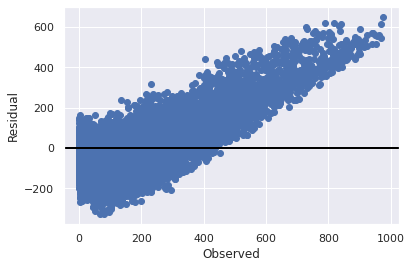

In [ ]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(reg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [ ]:
y_pred = reg.predict(X)

df = pd.DataFrame(y_pred)
y_pred

array([[ 90.2769105 ],
       [197.50813955],
       [369.54038326],
       ...,
       [276.0695647 ],
       [  7.01696769],
       [230.8951874 ]])

In [ ]:
y_true = y
y_true

array([[ 64],
       [106],
       [491],
       ...,
       [189],
       [100],
       [779]])

In [ ]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([[439.8949577 ],
       [194.30619163],
       [ 63.58562696],
       ...,
       [116.02520849],
       [438.5325247 ],
       [242.22160378]])

In [ ]:
y_test

,index,total_count
0,12830,425
1,8688,88
2,7091,4
3,12230,526
4,431,13
...,...,...
5731,6260,35
5732,16788,215
5733,819,161
5734,15323,634


In [ ]:
#This amount is even lower than my bank account balance. Obviously, linear regression is not a good choice for our data. But we will continue for learning purposes.
from sklearn.metrics import r2_score

r2_score(y_true,y_pred)

0.39598934513057393

In [ ]:
# WTF!!!
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

print(mae(y_true,y_pred),mse(y_true,y_pred))


106.23188093407971 20163.058355422716


**Assumptions: Checking for Homoscedasticity**

In [ ]:
##Checking for homoscedasticity...

residuals = y_true-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# It is kind of close to zero all good here.


Mean of Residuals 2.4801560406502166e-14


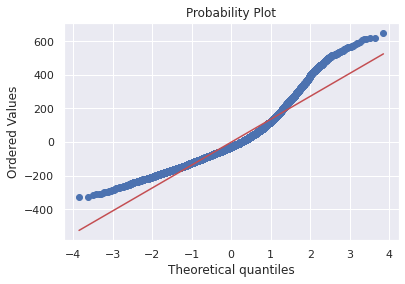

In [ ]:
import scipy.stats as stats

residuals_df = pd.DataFrame(residuals)
stats.probplot(residuals_df[0], dist="norm", plot=plt)
plt.show()
##Residuals are not normally distributed.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


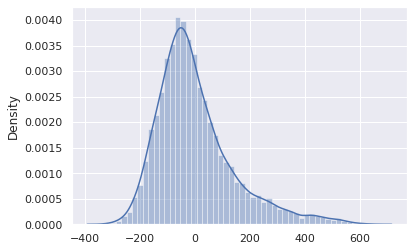

In [ ]:
sns.distplot(residuals)

In [ ]:
# Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.


import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

#Since p value is less than 0.05 in Goldfeld Quandt Test, we can reject it's null hypothesis that error terms are homoscedastic. Bad man. Very bad.


[('F statistic', 1.0619389724651285), ('p-value', 0.01103030050706093)]

In [ ]:
from scipy.stats import bartlett
test = bartlett(X.values.flatten(),residuals.flatten())
print(test)
#Since p value is  less than 0.05 in Bartlett, it's null hypothesis that error terms are homoscedastic gets rejected, that's not good for a regression

BartlettResult(statistic=54363.17304681931, pvalue=0.0)


**Checking for AutoCorreleation**

In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.


0.002933726581527433

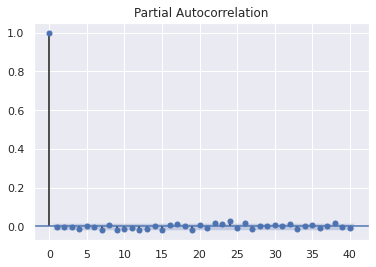

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

#The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


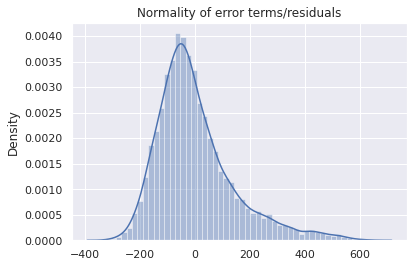

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')


In [ ]:
residuals.max()

650.2453246216514

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


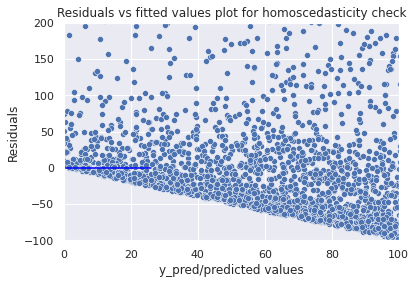

In [ ]:
df_residuals = pd.DataFrame(residuals)
df_y_pred = pd.DataFrame(y_pred)
df_residuals

p = sns.scatterplot(df_y_pred[0],df_residuals[0])
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-100,200)
plt.xlim(0,100)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#For the sake of linear regression model we do not want to see a scatter plot of funnel like shaped y_pred and residuals. This is also a good indicator of heteroscedasticity.

In [ ]:
result_df = pd.DataFrame()
y_test_pred = reg.predict(X_test)

y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred = y_test_pred_df[0]
result_df['Predicted'] = y_test_pred
result_df.head()


,Predicted
0,439.894958
1,194.306192
2,63.585627
3,410.419862
4,-18.596874


In [ ]:
result_df['True'] = y_test.total_count
result_df.sample(20)

,Predicted,True
1143,269.296056,198
3492,393.410827,494
2405,91.857305,13
2688,88.591691,4
5720,286.275177,280
240,188.148850,118
1803,44.237892,19
3823,285.725265,216
5365,262.962630,299
5724,355.696595,395


In [ ]:
residuals = y_test.total_count - y_test_pred 
residuals.mean()

-3.65372213359349

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


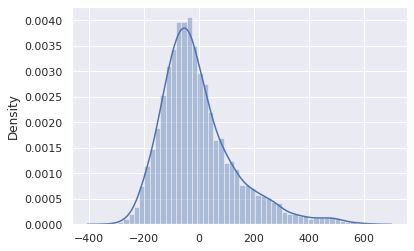

In [ ]:
sns.distplot(residuals)

In [ ]:
mae(y_test.total_count, y_test_pred)

104.32048693705036

In [ ]:
mse(y_test.total_count, y_test_pred)

19061.668100766532

In [ ]:
r2_score(y_test.total_count,y_test_pred)

0.4024827110479985

**Trying Decision Trees with Hyperparameter Tuning**

Since linear regression didn't give us what we wanted, we will take a loot at another algorithm. We are going from simple to complex models. 



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Base model
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(X,y)


DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [ ]:
#Hmm, at least better than previous one.
dtr.score(X,y)

0.5784880084730322

In [ ]:
param_grid = {
              "criterion": ["squared_error", "absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [ ]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)


In [ ]:
grid_cv_dtr.fit(X,y)


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100, 500, 800],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [ ]:
grid_cv_dtr.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_leaf_nodes': 500,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [ ]:
grid_cv_dtr.best_score_

0.8502103798697561

In [ ]:
dtr_best = DecisionTreeRegressor(criterion='squared_error',
 max_depth = 8,
 max_leaf_nodes = 500,
 min_samples_leaf = 20,
 min_samples_split = 20)
dtr_best.fit(X,y)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=500, min_samples_leaf=20,
                      min_samples_split=20)

In [ ]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')


In [ ]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))


avg R-squared::0.8517642327060819
MSE::-4941.063406837214


In [ ]:
dtr_best.score(X,y)

0.8605951541174667

In [ ]:
dtr_test_predict = dtr_best.predict(X_test)
dtr_test_predict = pd.DataFrame(dtr_test_predict)
dtr_test_predict = dtr_test_predict[0]
dtr_result = pd.DataFrame()
dtr_result['Pred'] = dtr_test_predict
dtr_result['True'] = y_test.total_count
dtr_result

,Pred,True
0,363.738095,425
1,201.774436,88
2,14.481481,4
3,519.833333,526
4,10.868421,13
...,...,...
5731,105.984848,35
5732,405.286885,215
5733,88.510526,161
5734,428.018182,634


In [ ]:
mse(y_test.total_count,dtr_test_predict)


4743.294924299597

In [ ]:
mae(y_test.total_count,dtr_test_predict)


44.12551822349025

In [ ]:
residuals = y_test.total_count - my_new
residuals.mean()

0.21277554956926115

In [ ]:
r2_score(y_test.total_count,my_new)

0.8513141290214096

**Random Forest Regressor**

Ensemble methods are pretty powerful. Let's deploy Random Forest Regressor to see if it overperforms the previous ones.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X,y)
rf_tree_y_pred = rf_tree.predict(X)
print("Accuracy: {}".format(rf_tree.score(X,y)))
print("R squared: {}".format(r2_score(y_true=y,y_pred=rf_tree_y_pred)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.9922765668915433
R squared: 0.9922765668915433


In [ ]:
rf_tree_y_pred

array([ 63.36, 113.95, 503.13, ..., 188.12, 102.72, 771.31])

In [ ]:
y_test_pred_rf = rf_tree.predict(X_test)
y_test_pred_rf

array([356.82, 103.46,  10.99, ..., 160.08, 539.43, 124.28])

In [ ]:
y_test

,index,total_count
0,12830,425
1,8688,88
2,7091,4
3,12230,526
4,431,13
...,...,...
5731,6260,35
5732,16788,215
5733,819,161
5734,15323,634


In [ ]:
#This is freaking awesome! Random Forest seems to be the best performing model so far. Reaching up to 95 percent r2 score!
rf_tree_result = pd.DataFrame()
rf_tree_result['Pred'] = y_test_pred_rf 
rf_tree_result['True'] = y_test.total_count
rf_tree_result

,Pred,True
0,356.82,425
1,103.46,88
2,10.99,4
3,563.85,526
4,13.27,13
...,...,...
5731,40.92,35
5732,257.55,215
5733,160.08,161
5734,539.43,634


In [ ]:
rf_residuals = y_test.total_count - y_test_pred_rf

rf_residuals.mean()

-0.8983629707112994

In [ ]:
print("R squared: {}".format(r2_score(y_true=y_test.total_count,y_pred=y_test_pred_rf)))


R squared: 0.9460068802503173


In [ ]:
mae(y_test.total_count,y_test_pred_rf)


24.784893654114363

**Gradient Boosting Regressor**
There are some algorithms that I really like to use in most cases to see if they perform well. New generation algorithms like gradient boosting machines, Extreme Boosting machines are 

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

#See the mean absoule error values with cross validation.
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
model = GradientBoostingRegressor()
model.fit(X, y.ravel())


MAE: -47.141 (1.827)


GradientBoostingRegressor()

In [ ]:
n_scores

array([-48.96210868, -47.75598975, -48.7018555 , -45.71911057,
       -44.11214449, -48.71621362, -46.49180239, -45.26323968,
       -47.25123479, -48.34287162, -47.17760693, -49.78857746,
       -44.00530127, -46.47832507, -44.88307407, -46.59306739,
       -44.63404017, -49.77810658, -48.25030264, -48.00208892,
       -46.90519634, -45.87060475, -47.44831522, -45.06334117,
       -47.32153498, -49.16097029, -50.43867562, -48.95508147,
       -48.35975358, -43.79903686])

In [ ]:
model.score(X,y.ravel())

0.8653685632929817

In [ ]:
pred = model.predict(X)
pred

array([ 47.81640861, 161.49171755, 454.5079818 , ..., 213.41580621,
       136.71473057, 508.04056418])

In [ ]:
model.score(X,y)

0.8653685632929817

In [ ]:
y_test_pred_gmb = model.predict(X_test)
y_test_pred_gmb

array([455.9946146 ,  91.69542698,  30.28807025, ..., 150.80406799,
       522.70931635, 130.02054932])

In [ ]:
gbm_result = pd.DataFrame()
gbm_result['Pred'] = y_test_pred_gmb 
gbm_result['True'] = y_test.total_count 
gbm_result

,Pred,True
0,455.994615,425
1,91.695427,88
2,30.288070,4
3,527.282827,526
4,5.391014,13
...,...,...
5731,92.093381,35
5732,251.866836,215
5733,150.804068,161
5734,522.709316,634


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test.total_count,y_test_pred_gmb)

0.8653385546280956

# Conclusion
As a result we have created 4 different models to give us robust predictions for our data. 
Linear regression was the worst performing model with .40 r2 score while random forest regressor was outperforming all the models including Gradient Boosting Machines and Decision Tree Regressor with .90  r2.score. I encourage you to dive deep in studying and preprocessing the data to obtain even better results. It is also an option to fine-tune the models. 
Thanks for reading! 